In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn import preprocessing

กำจัด 0 จาก Feature แต่เหลือ out ไม่จัดการ

# **Dataset Import**

In [41]:
train_dataset = "../Train/Final_Train.csv"
dataset = pd.read_csv(train_dataset) 
dataset

,Unnamed: 0,MOFnumber,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,...,metal_type,number_of_metal_atom,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio,CO2_working_capacity [mL/g]
0,0,1,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,...,Zn,2,54.0,1.800000,6.666667,21.000000,0.306667,1.044267,0.095238,105.284502
1,1,2,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,...,Ba,2,105.0,1.478873,2.816901,35.000000,0.237113,0.846289,0.000000,101.224774
2,2,3,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,...,Cu,2,47.0,1.566667,6.666667,14.000000,0.195122,0.661463,0.142857,118.987011
3,3,4,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,...,V,4,100.0,1.785714,7.142857,11.500000,0.205357,0.706429,0.000000,187.626004
4,4,5,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,...,Cu,2,47.0,1.678571,7.142857,18.000000,0.276596,0.917447,0.444444,79.210001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68608,68608,68609,mof_unit_68609,1188.302573,1001.700216,0.00,0.00000,0.0000,Pr-F,3,...,Zn,2,68.0,1.446809,4.255319,8.000000,0.126050,0.449580,0.250000,-12.943652
68609,68609,68610,mof_unit_68610,1506.660363,1493.296496,0.00,0.01108,0.0000,SO3H,10,...,Ba,2,53.0,1.394737,5.263158,27.000000,0.214286,0.737143,0.000000,-12.985582
68610,68610,68611,mof_unit_68611,2035.532738,1959.518320,0.00,0.00000,0.0000,OPr,4,...,Cr,6,139.0,1.579545,6.818182,10.666667,0.156863,0.539608,0.000000,-13.187635
68611,68611,68612,mof_unit_68612,3985.426053,3638.677280,0.00,0.00000,0.0000,OPr-Me,4,...,Cr,12,256.0,1.600000,7.500000,10.000000,0.164835,0.567033,0.000000,15.672698


# **Surface Area Organizer**

In [42]:
# Surface_Test = "../Train/Surface_ALL.csv"
# Surface = pd.read_csv(Surface_Test) 
# for x in range(0,Surface.shape[0]) :
#     if(Surface.iloc[x][4]>0 and Surface.iloc[x][3] <=0):
#       # i+=1;
#       dataset['surface_area [m^2/g]'][x] = Surface.iloc[x][8]

In [43]:
dataset

,Unnamed: 0,MOFnumber,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,...,metal_type,number_of_metal_atom,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio,CO2_working_capacity [mL/g]
0,0,1,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,...,Zn,2,54.0,1.800000,6.666667,21.000000,0.306667,1.044267,0.095238,105.284502
1,1,2,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,...,Ba,2,105.0,1.478873,2.816901,35.000000,0.237113,0.846289,0.000000,101.224774
2,2,3,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,...,Cu,2,47.0,1.566667,6.666667,14.000000,0.195122,0.661463,0.142857,118.987011
3,3,4,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,...,V,4,100.0,1.785714,7.142857,11.500000,0.205357,0.706429,0.000000,187.626004
4,4,5,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,...,Cu,2,47.0,1.678571,7.142857,18.000000,0.276596,0.917447,0.444444,79.210001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68608,68608,68609,mof_unit_68609,1188.302573,1001.700216,0.00,0.00000,0.0000,Pr-F,3,...,Zn,2,68.0,1.446809,4.255319,8.000000,0.126050,0.449580,0.250000,-12.943652
68609,68609,68610,mof_unit_68610,1506.660363,1493.296496,0.00,0.01108,0.0000,SO3H,10,...,Ba,2,53.0,1.394737,5.263158,27.000000,0.214286,0.737143,0.000000,-12.985582
68610,68610,68611,mof_unit_68611,2035.532738,1959.518320,0.00,0.00000,0.0000,OPr,4,...,Cr,6,139.0,1.579545,6.818182,10.666667,0.156863,0.539608,0.000000,-13.187635
68611,68611,68612,mof_unit_68612,3985.426053,3638.677280,0.00,0.00000,0.0000,OPr-Me,4,...,Cr,12,256.0,1.600000,7.500000,10.000000,0.164835,0.567033,0.000000,15.672698


# **Cleansing Dataset**

In [44]:
drop_A=dataset.index[dataset["surface_area [m^2/g]"] <= 0].tolist()
# drop_B=dataset.index[dataset["void_fraction"] == 0].tolist()
# drop_C=dataset.index[dataset["void_volume [cm^3/g]"] == 0].tolist()
# drop_D=dataset.index[dataset["CO2/N2_selectivity"] == 0].tolist()
# drop_E=dataset.index[dataset["heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]"] == 0].tolist()
# drop_F=dataset.index[dataset["CO2_working_capacity [mL/g]"] == 0].tolist()
# cleaned_value=drop_A+drop_B+drop_C+drop_D+drop_E
cleaned_value=drop_A


# dataset = dataset.drop(68611)
# dataset = dataset.drop(68612)

dataset = dataset.drop(dataset.index[cleaned_value])

dataset = dataset.dropna(axis='rows')
dataset.shape

(53778, 44)

In [45]:
dataset.to_csv("count.csv")

Drop Feature

In [46]:
trainset = dataset
trainset = trainset.drop('MOFname',axis=1)
trainset = trainset.drop('MOFnumber',axis=1)
trainset = trainset.drop('Unnamed: 0',axis=1)
trainset = trainset.drop('functional_groups',axis=1)
trainset = trainset.drop('topology',axis=1)
trainset = trainset.drop('metal_type',axis=1)
trainset

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,Ni,number_of_metal_atom,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio,CO2_working_capacity [mL/g]
1,2769.503842,2211.697211,603.61,0.13794,0.1040,10,44,57,33.616780,7.147286,...,0,2,105.0,1.478873,2.816901,35.0,0.237113,0.846289,0.000000,101.224774
2,1089.818728,773.687960,788.50,0.14874,0.1262,2,22,24,19.263726,6.347967,...,0,2,47.0,1.566667,6.666667,14.0,0.195122,0.661463,0.142857,118.987011
3,2205.198301,1304.638720,1441.53,0.21814,0.2220,9,17,24,25.701377,6.190085,...,0,4,100.0,1.785714,7.142857,11.5,0.205357,0.706429,0.000000,187.626004
5,3954.659761,1543.027680,2430.55,0.37094,0.5725,9,7,23,17.146541,5.398304,...,0,4,117.0,1.625000,5.555556,12.0,0.158537,0.540488,0.083333,55.786959
6,3565.914939,1954.749656,1530.02,0.33337,0.3662,10,53,55,18.363791,6.303857,...,0,2,110.5,1.625000,2.941176,28.0,0.192308,0.646154,0.250000,111.690462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66519,1426.479810,1272.451540,1343.62,0.30190,0.2038,3,12,21,5.867674,4.485481,...,0,2,33.0,1.833333,11.111111,8.0,0.227273,0.763636,0.250000,7.602105
66520,23943.701370,5497.752320,4182.24,0.66340,1.7399,1,9,27,4.060772,3.605688,...,0,16,434.0,1.870690,6.896552,8.5,0.210084,0.695798,0.470588,2.675231
66521,14389.971560,4396.164320,4149.64,0.57051,1.1246,1,9,20,4.313411,3.361233,...,0,16,290.0,1.726190,9.523810,7.5,0.200000,0.681412,0.000000,-1.686092
66522,16997.806650,3932.703680,4326.62,0.66963,1.7430,2,2,5,3.447440,2.781566,...,0,12,338.0,2.112500,7.500000,8.0,0.281690,0.923944,0.666667,-7.546805


In [47]:
trainset.to_csv("TEST2.csv")

Dummy

In [48]:
# topology = trainset["topology"].values
# trainset["topology"] = topology
# trainset = pd.get_dummies(trainset)
# trainset

# **Nomalizing Dataset**

In [49]:
def normalize(df):
    result = df.copy()
    for feature in df.columns:
        maxvalue = df[feature].max()
        minvalue = df[feature].min()
        cap = maxvalue - minvalue
        max = maxvalue + (0.1*cap)
        min = minvalue - (0.1*cap)
        result[feature] = (df[feature] - min) / (max - min)
        MaxMin[feature] = [max,min]
    return result

In [50]:
MaxMin = {}
X_normalize = normalize(trainset)
X_normalize

Y = X_normalize["CO2_working_capacity [mL/g]"].values
X_normalize = X_normalize.drop('CO2_working_capacity [mL/g]',axis=1)

In [51]:
MaxMinData = pd.DataFrame(data=MaxMin)
MaxMinData.to_csv("MaxMinData", index=False)

In [52]:
X_normalize

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,Cr,Ni,number_of_metal_atom,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio
1,0.091403,0.149996,0.150318,0.194153,0.094504,0.765152,0.701149,0.887931,0.203470,0.595843,...,0.083333,0.083333,0.083333,0.121968,0.199961,0.130670,0.414773,0.340688,0.358202,0.083333
2,0.085136,0.095911,0.172184,0.204782,0.097310,0.159091,0.385057,0.413793,0.148678,0.521830,...,0.083333,0.083333,0.083333,0.095912,0.247589,0.248160,0.215909,0.286987,0.287924,0.088745
3,0.089298,0.115880,0.249414,0.273085,0.109416,0.689394,0.313218,0.413793,0.173254,0.507211,...,0.083333,0.083333,0.119565,0.119721,0.366421,0.262693,0.192235,0.300077,0.305022,0.083333
5,0.095825,0.124846,0.366381,0.423469,0.153708,0.689394,0.169540,0.399425,0.140596,0.433897,...,0.083333,0.083333,0.119565,0.127358,0.279234,0.214251,0.196970,0.240200,0.241924,0.086490
6,0.094374,0.140332,0.259880,0.386493,0.127638,0.765152,0.830460,0.859195,0.145243,0.517746,...,0.083333,0.083333,0.083333,0.124438,0.279234,0.134463,0.348485,0.283388,0.282103,0.092803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66519,0.086392,0.114670,0.237835,0.355521,0.107116,0.234848,0.241379,0.370690,0.097540,0.349374,...,0.083333,0.083333,0.083333,0.089623,0.392254,0.383799,0.159091,0.328104,0.326774,0.092803
66520,0.170402,0.273587,0.573545,0.711306,0.301230,0.083333,0.198276,0.456897,0.090642,0.267910,...,0.083333,0.083333,0.336957,0.269766,0.412520,0.255176,0.163826,0.306122,0.300980,0.101159
66521,0.134758,0.232156,0.569690,0.619884,0.223475,0.083333,0.198276,0.356322,0.091607,0.245275,...,0.083333,0.083333,0.336957,0.205076,0.334130,0.335357,0.154356,0.293226,0.295509,0.083333
66522,0.144488,0.214724,0.590620,0.717437,0.301621,0.159091,0.097701,0.140805,0.088301,0.191601,...,0.083333,0.083333,0.264493,0.226640,0.543701,0.273593,0.159091,0.397695,0.387730,0.108586


# **Modeling**

In [53]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [54]:
X = X_normalize
X, Y = X.astype('float'), Y.astype('float')


In [55]:
n_features = X.shape[1]

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.00001)
print(X_train.shape)
print(X_test.shape)

(53777, 37)
(1, 37)


In [57]:
model = Sequential()
model.add(Dense(64, input_dim=n_features, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                2432      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                

In [58]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt, metrics=['mse'])
history = model.fit(X_train, Y_train, epochs=2000, batch_size=512, verbose=1)

Epoch 1/2000
106/106 [==============================] - 0s 918us/step - loss: 0.0063 - mse: 0.0063
Epoch 2/2000
106/106 [==============================] - 0s 803us/step - loss: 0.0019 - mse: 0.0019
Epoch 3/2000
106/106 [==============================] - 0s 858us/step - loss: 0.0016 - mse: 0.0016
Epoch 4/2000
106/106 [==============================] - 0s 946us/step - loss: 0.0013 - mse: 0.0013
Epoch 5/2000
106/106 [==============================] - 0s 886us/step - loss: 0.0012 - mse: 0.0012
Epoch 6/2000
106/106 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011
Epoch 7/2000
106/106 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011
Epoch 8/2000
106/106 [==============================] - 0s 870us/step - loss: 0.0011 - mse: 0.0011
Epoch 9/2000
106/106 [==============================] - 0s 824us/step - loss: 0.0011 - mse: 0.0011
Epoch 10/2000
106/106 [==============================] - 0s 899us/step - loss: 0.0010 - mse: 0.0010
Epoch 11/2000

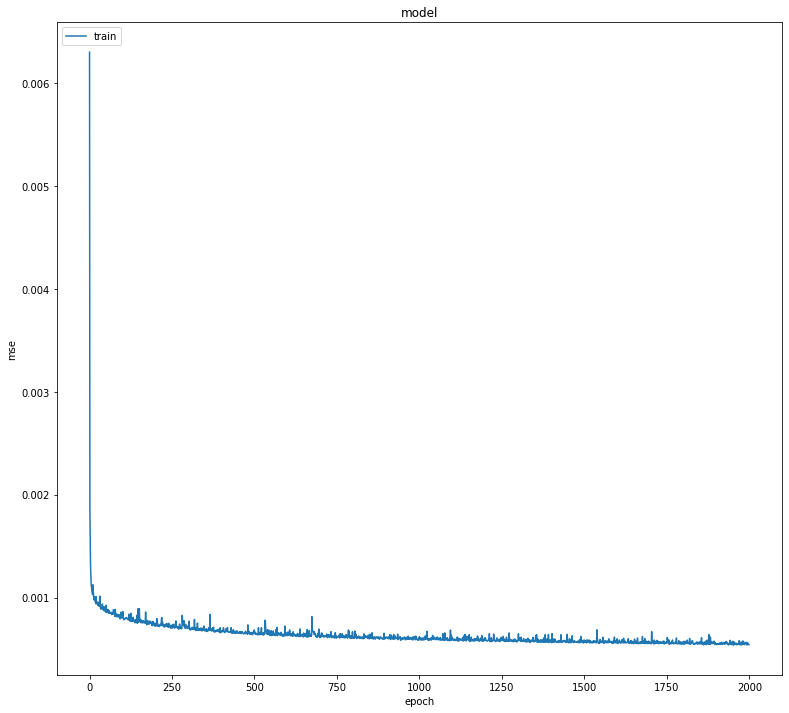

In [59]:
plt.plot(history.history['mse'])
plt.title('model')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams['figure.figsize'] = [13, 12]

plt.show()

In [60]:
Y_pred_test = model.predict(X_test)
Y_pred_train = model.predict(X_train)
error = mean_absolute_error(Y_test, Y_pred_test)
error_train = mean_absolute_error(Y_train, Y_pred_train)
print('MAE: %.3f' % error)
print('MAE_train: %.3f' % error_train)


MAE: 0.004
MAE_train: 0.016


In [61]:
model.save("model.h5")

# **Prediction**

---

**Preprocessing Test set**

In [62]:
def normalize_pred(df):
  result = df.copy()
  for feature in df.columns:
    max = MaxMinData[feature][0]
    min = MaxMinData[feature][1]
    result[feature] = (df[feature] - min) / (max - min)
  return result

In [63]:
dataset_test_path = '../Test/Final_Test.csv'
MaxMinData = pd.read_csv("MaxMinData")

dataset_test = pd.read_csv(dataset_test_path)
# subdata = subdata.drop('MOFname',axis=1)
# subdata["topology_code"] = pd.factorize(subdata.topology)[0]
# subdata["topology_code"] = subdata["topology_code"] + 1
# subdata = subdata.drop('topology',axis=1)
# subdata = normalize(subdata)

# subdata = subdata.drop('topology_code',axis=1)
# subdata = subdata.drop('functional_groups',axis=1)

# title = list(subdata.columns)
# title[10], title[12] = title[12], title[11]
# subdata = subdata[title]

dataset_test

,Unnamed: 0,MOFnumber,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,...,Ni,metal_type,number_of_metal_atom,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio
0,0,1,mof_unit_68614,1208.301332,797.70936,586.54,0.11392,0.1039,OEt,2,...,0,Cu,2,51.0,1.593750,6.250000,14.000000,0.190476,0.645714,0.142857
1,1,2,mof_unit_68615,4126.414623,3733.65779,852.49,0.21367,0.1422,H-I,4,...,0,Cr,6,164.0,1.822222,6.666667,8.666667,0.164557,0.566076,0.000000
2,2,3,mof_unit_68616,1602.148373,747.21048,3155.73,0.33883,0.4375,CN-OH,3,...,0,Zn,2,62.0,2.066667,6.666667,10.000000,0.266667,0.877333,0.600000
3,3,4,mof_unit_68617,2436.629312,995.80232,3521.09,0.40464,0.5963,OMe,2,...,0,Cu,2,80.0,1.818182,4.545455,16.000000,0.212766,0.714894,0.250000
4,4,5,mof_unit_68618,3123.418006,1337.53800,2678.46,0.38959,0.5479,NO2-Pr,3,...,0,Zn,2,87.0,2.071429,4.761905,28.000000,0.372881,1.228475,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,16995,16996,mof_unit_85609,32660.944610,4723.68288,5720.14,0.77614,3.2318,OH-NO2,3,...,0,Zn,12,370.0,1.778846,5.769231,12.666667,0.201923,0.686923,0.105263
16996,16996,16997,mof_unit_85610,5070.998617,1499.13262,4017.28,0.59192,1.2058,Me-OMe,3,...,0,Zn,6,89.0,1.679245,11.320755,9.000000,0.217742,0.749032,0.000000
16997,16997,16998,mof_unit_85611,4669.804446,1322.04892,4288.76,0.54950,1.1689,Me-CN,2,...,0,Cu,2,141.0,2.203125,3.125000,8.000000,0.250000,0.788571,2.500000
16998,16998,16999,mof_unit_85612,4682.120862,1213.51148,4331.86,0.60643,1.4091,OH-HCO,3,...,0,Zn,2,101.0,1.870370,3.703704,24.000000,0.250000,0.852308,0.083333


In [64]:
dataset_test = pd.read_csv(dataset_test_path)
dataset_test = dataset_test.drop('MOFname',axis=1)
# dataset_test = dataset_test.drop('topology',axis=1)
dataset_test = dataset_test.drop('MOFnumber',axis=1)
dataset_test = dataset_test.drop('Unnamed: 0',axis=1)
dataset_test = dataset_test.drop('functional_groups',axis=1)
dataset_test = dataset_test.drop('topology',axis=1)
dataset_test = dataset_test.drop('metal_type',axis=1)
# dataset_test = dataset_test.drop('metal_type',axis=1)

In [65]:
# topology = dataset_test["topology"].values
# dataset_test["topology"] = topology
# dataset_test = pd.get_dummies(dataset_test)
# dataset_test

In [66]:
dataset_test = normalize_pred(dataset_test)
dataset_test = dataset_test.astype('float')

In [67]:
dataset_test

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,Cr,Ni,number_of_metal_atom,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio
0,0.085578,0.096814,0.148299,0.170513,0.094492,0.159091,0.140805,0.442529,0.215010,0.582727,...,0.083333,0.083333,0.083333,0.097709,0.262281,0.235444,0.215909,0.281046,0.281936,0.088745
1,0.096466,0.207238,0.179751,0.268686,0.099332,0.310606,0.155172,0.313218,0.145346,0.408072,...,0.500000,0.083333,0.155797,0.148473,0.386227,0.248160,0.165404,0.247899,0.251654,0.083333
2,0.087048,0.094915,0.452145,0.391867,0.136648,0.234848,0.227011,0.313218,0.125007,0.401220,...,0.083333,0.083333,0.083333,0.102650,0.518837,0.248160,0.178030,0.378483,0.370007,0.106061
3,0.090161,0.104265,0.495354,0.456637,0.156715,0.159091,0.083333,0.471264,0.111792,0.406853,...,0.083333,0.083333,0.083333,0.110737,0.384035,0.183424,0.234848,0.309552,0.308240,0.092803
4,0.092723,0.117118,0.395700,0.441825,0.150599,0.234848,0.183908,0.341954,0.124672,0.423650,...,0.083333,0.083333,0.083333,0.113881,0.521420,0.190029,0.348485,0.514316,0.503525,0.104978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0.202926,0.244474,0.755425,0.822263,0.489758,0.234848,0.112069,0.270115,0.092459,0.225410,...,0.083333,0.083333,0.264493,0.241015,0.362695,0.220772,0.203283,0.295685,0.297605,0.087321
16996,0.099990,0.123195,0.554036,0.640956,0.233736,0.234848,0.083333,0.227011,0.100891,0.272835,...,0.083333,0.083333,0.155797,0.114780,0.308662,0.390197,0.168561,0.315915,0.321221,0.083333
16997,0.098493,0.116535,0.586143,0.599206,0.229073,0.159091,0.169540,0.399425,0.092954,0.266740,...,0.083333,0.083333,0.083333,0.138140,0.592865,0.140073,0.159091,0.357168,0.336256,0.178030
16998,0.098539,0.112453,0.591240,0.655236,0.259427,0.234848,0.169540,0.428161,0.093553,0.253911,...,0.083333,0.083333,0.083333,0.120171,0.412347,0.157734,0.310606,0.357168,0.360491,0.086490


Predicting

In [68]:
from keras.models import load_model
import numpy as np

In [69]:
# model = load_model('/content/drive/MyDrive/Colab Notebooks/TMLCC/CleanOutput_1/modelv1.h5')

In [70]:
result = model.predict(dataset_test)
result
with np.printoptions(threshold=np.inf):
    print(result)

[[0.31795472]
 [0.19212125]
 [0.176619  ]
 [0.17701027]
 [0.17690614]
 [0.18376316]
 [0.26446223]
 [0.29369235]
 [0.18664518]
 [0.30373693]
 [0.16699046]
 [0.17936347]
 [0.35261792]
 [0.3131686 ]
 [0.21165305]
 [0.2811814 ]
 [0.1738856 ]
 [0.17232524]
 [0.24634744]
 [0.1898268 ]
 [0.3328193 ]
 [0.25076836]
 [0.20858383]
 [0.19538699]
 [0.38713378]
 [0.26135302]
 [0.22319804]
 [0.37276942]
 [0.18304992]
 [0.18056124]
 [0.23907693]
 [0.2182543 ]
 [0.40595442]
 [0.18495129]
 [0.26024234]
 [0.1869598 ]
 [0.38484967]
 [0.18354753]
 [0.19800791]
 [0.27225682]
 [0.21037441]
 [0.2100457 ]
 [0.20575029]
 [0.33890784]
 [0.17843421]
 [0.22513705]
 [0.35273963]
 [0.27683264]
 [0.17861073]
 [0.18640801]
 [0.19158238]
 [0.21716316]
 [0.28814405]
 [0.20078018]
 [0.39837545]
 [0.21021107]
 [0.44847512]
 [0.21178934]
 [0.1870091 ]
 [0.24810992]
 [0.18377863]
 [0.18801084]
 [0.29108477]
 [0.2618606 ]
 [0.3210789 ]
 [0.20596763]
 [0.19057381]
 [0.22982638]
 [0.1962876 ]
 [0.1946959 ]
 [0.1903125 ]
 [0.20

Denormalization

In [71]:
def denormalization(input):
    result = []
    cap = MaxMinData['CO2_working_capacity [mL/g]'][0] - MaxMinData['CO2_working_capacity [mL/g]'][1]
    for i in range(len(input)):
        result.append(((input[i][0]*cap) + MaxMinData['CO2_working_capacity [mL/g]'][1]))
    return result

In [72]:
result = denormalization(result)
result

[190.99068022280795,
 76.43113585842316,
 62.31778596474631,
 62.67400479486626,
 62.57920484114253,
 68.8218794698199,
 142.29079901551012,
 168.90207394746642,
 71.44568660344284,
 178.04671516184914,
 53.55191044984376,
 64.81637793339068,
 222.54826619187207,
 186.6333552748344,
 94.213005197731,
 157.51202501405965,
 59.829287179497854,
 58.408725880953355,
 125.7989850281494,
 74.3422538786756,
 204.52349571183385,
 129.82381826664738,
 91.4187670654487,
 79.40428380606157,
 253.9717104977392,
 139.46014945280507,
 104.7236312633441,
 240.89430921113262,
 68.172537771911,
 65.90683515724142,
 119.17986450424014,
 100.22281760464703,
 271.10613739407825,
 69.90355942262609,
 138.44898612270293,
 71.73212138062131,
 251.8922433960518,
 68.62556433954852,
 81.79038561782595,
 149.38703951258253,
 93.04892471273847,
 92.74965639860768,
 88.83909047696936,
 210.06652551890346,
 63.97036838643582,
 106.48892089962102,
 222.6590741515194,
 153.55289243038192,
 64.13107248658058,
 71.229

In [73]:
formatter = {"CO2_working_capacity [mL/g]":[],"id":[]}
for i in range(68614,85614):
    formatter['CO2_working_capacity [mL/g]'].append(result[i-68614])
    formatter['id'].append(str(i))

In [74]:
df_submission = pd.DataFrame(data=formatter)
id = df_submission['id'].values
output = df_submission['CO2_working_capacity [mL/g]'].values
submission = pd.DataFrame({"id": id,"CO2_working_capacity [mL/g]": output})

In [75]:
submission

,id,CO2_working_capacity [mL/g]
0,68614,190.990680
1,68615,76.431136
2,68616,62.317786
3,68617,62.674005
4,68618,62.579205
...,...,...
16995,85609,-6.564867
16996,85610,0.711491
16997,85611,2.051971
16998,85612,-0.096045


In [76]:
submission.to_csv("submission.csv", index=False)